# Sales Data Analysis 


In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [33]:
# path ="/Users/aakritirajpal/Desktop/python/archive"
# files = [file for file in os.listdir(path)]
# entire_data=pd.DataFrame()
# for file in files:
#     year_df=pd.read_csv(path+"/"+file)
#     entire_data=pd.concat([entire_data,year_df])
# entire_data.to_csv(path+"/combined_data.csv")

In [34]:
entire_data=pd.read_csv("combined_data.csv")
del entire_data['Unnamed: 0']
entire_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [35]:
#dChecking for NaN values
entire_data.isna().sum()
#dropping NaN values
entire_data=entire_data.dropna(how="all")
entire_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [36]:
#Replacing the space in column name with underscore and changing the case
entire_data.columns
entire_data.columns=[x for x in entire_data.columns.str.replace(" ","_").str.lower()]
entire_data

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [37]:
entire_data["month"]=entire_data["order_date"].apply(lambda x: x.split("/")[0])
entire_data

<ipython-input-37-c1d422474cad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire_data["month"]=entire_data["order_date"].apply(lambda x: x.split("/")[0])


,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06


In [38]:
entire_data["month"].unique()

array(['12', 'Order Date', '01', '04', '05', '02', '03', '08', '09', '06',
       '11', '10', '07'], dtype=object)

In [39]:
#dropping the record where the month is order date
filt=entire_data["month"]=="Order Date"
entire_data=entire_data[~filt]

## Analysing the best month for sale 

In [40]:
#changing the dtype to int
entire_data["month"]=entire_data["month"].astype(int)
entire_data["price_each"]=entire_data["price_each"].astype(float)
entire_data["quantity_ordered"]=entire_data["quantity_ordered"].astype(int)
entire_data.dtypes

<ipython-input-40-0b1092da50c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire_data["month"]=entire_data["month"].astype(int)
<ipython-input-40-0b1092da50c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire_data["price_each"]=entire_data["price_each"].astype(float)
<ipython-input-40-0b1092da50c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

order_id             object
product              object
quantity_ordered      int64
price_each          float64
order_date           object
purchase_address     object
month                 int64
dtype: object

In [41]:
entire_data["sales"]=entire_data["price_each"]*entire_data["quantity_ordered"]

<ipython-input-41-9856329bfd17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire_data["sales"]=entire_data["price_each"]*entire_data["quantity_ordered"]


In [42]:
month_grp=entire_data.groupby("month")

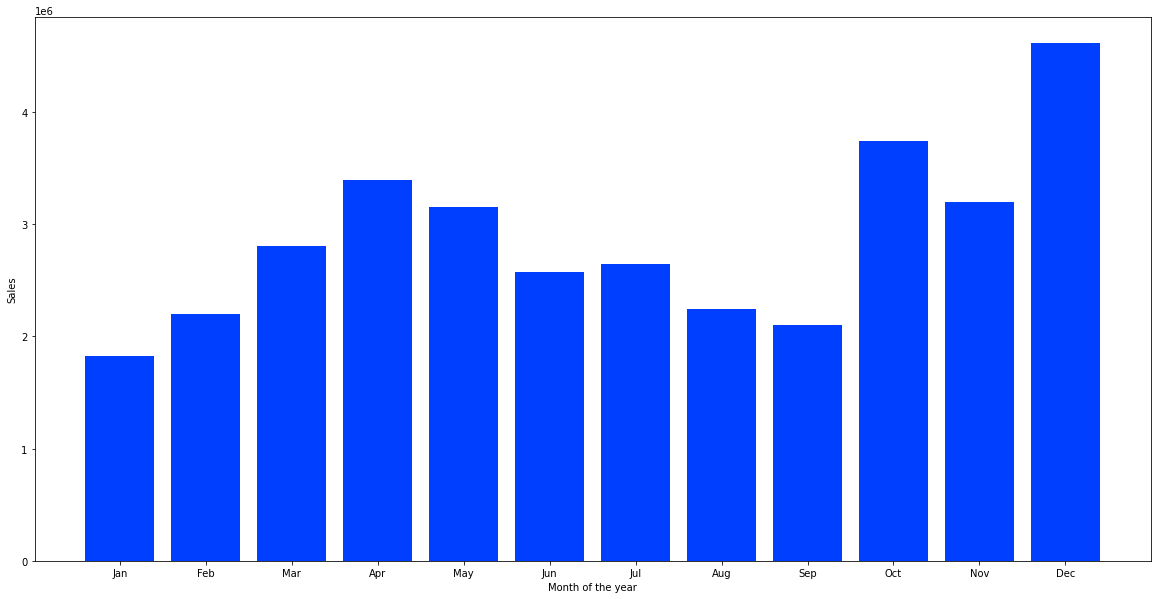

In [43]:
month_name=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
month_no=np.arange(1,13)
plt.style.use("seaborn-bright")
plt.figure(figsize=(20,10))
plt.bar(month_no,month_grp["sales"].sum())
plt.xticks(month_no,month_name)
plt.xlabel("Month of the year")
plt.ylabel("Sales")
plt.show()

## Analysing which city has the maximum orders 

In [44]:
entire_data["city"]=entire_data["purchase_address"].apply(lambda x:x.split(",")[1])

<ipython-input-44-8e395fec4235>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire_data["city"]=entire_data["purchase_address"].apply(lambda x:x.split(",")[1])


Text(0, 0.5, 'Number of Orders')

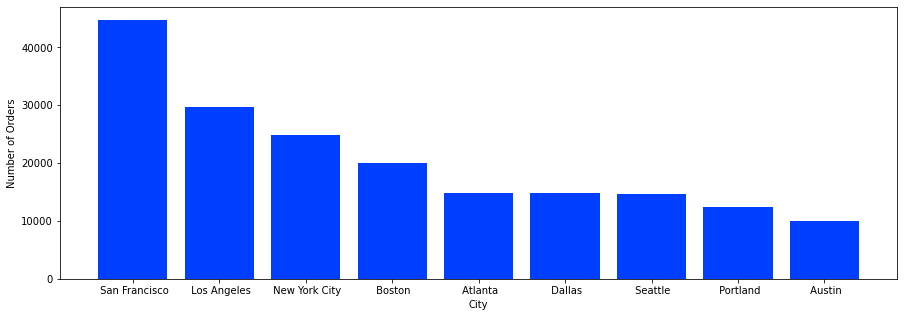

In [45]:
plt.figure(figsize=(15,5))
plt.bar(entire_data["city"].value_counts().index,entire_data["city"].value_counts())
plt.xlabel("City")
plt.ylabel("Number of Orders")

## Analysing the time when sales are maximum

In [46]:
entire_data["Hour"]=pd.to_datetime(entire_data["order_date"]).dt.hour
entire_data

<ipython-input-46-eabe7d3a22a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire_data["Hour"]=pd.to_datetime(entire_data["order_date"]).dt.hour


,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City,19
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


([<matplotlib.axis.XTick at 0x132c4adc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

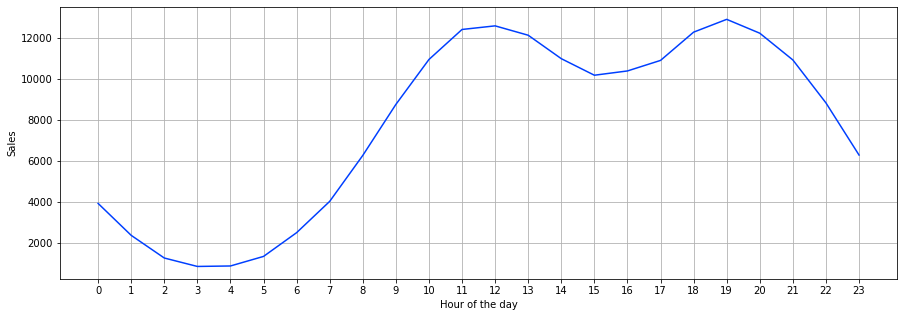

In [47]:
plt.figure(figsize=(15,5))
plt.grid()
plt.xlabel("Hour of the day")
plt.ylabel("Sales")
plt.plot(entire_data.groupby("Hour").size().index,entire_data.groupby("Hour").size())
plt.xticks(np.arange(24))

## Analysing which product is sold the most

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

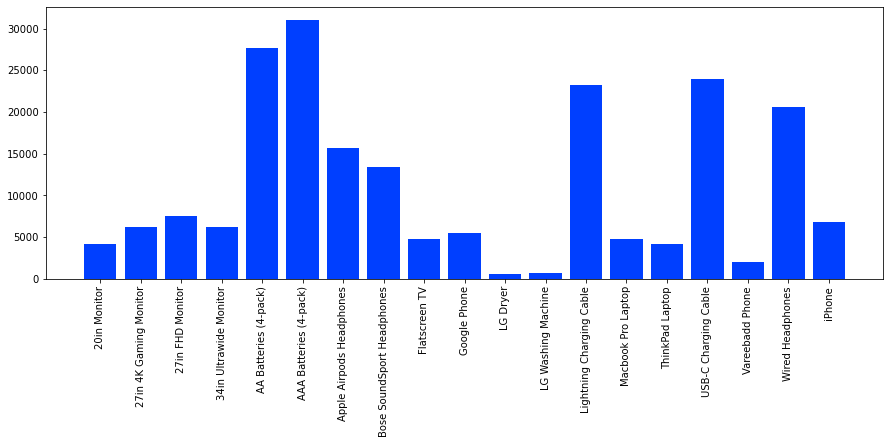

In [48]:
plt.figure(figsize=(15,5))
product_grp=entire_data.groupby("product")
plt.bar(product_grp["quantity_ordered"].sum().index,product_grp["quantity_ordered"].sum())
plt.xticks(rotation=90)

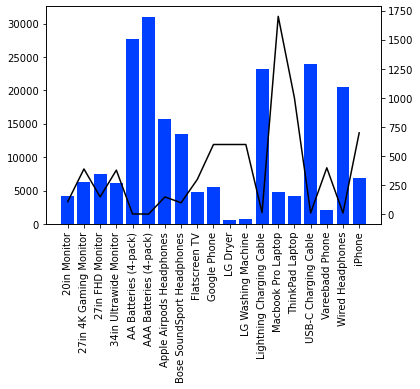

In [49]:
products = product_grp["quantity_ordered"].sum().index
quantity = product_grp["quantity_ordered"].sum()
price= product_grp["price_each"].mean()
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity)
ax2.plot(products,price,color="k")
ax1.tick_params(axis='x',labelrotation =90)

## Analysing the products that are most often sold together 

In [50]:
dupl_filt=entire_data["order_id"].duplicated(keep=False)
df_dup=entire_data[dupl_filt]
df_dup

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,Hour
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City,14
...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,06/18/19 11:37,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles,11
186822,222884,Google Phone,1,600.00,06/04/19 12:06,"819 Pine St, New York City, NY 10001",6,600.00,New York City,12
186823,222884,USB-C Charging Cable,1,11.95,06/04/19 12:06,"819 Pine St, New York City, NY 10001",6,11.95,New York City,12
186842,222903,iPhone,1,700.00,06/07/19 22:21,"685 Hickory St, New York City, NY 10001",6,700.00,New York City,22


In [51]:
df_dup["grouped_products"]=df_dup.groupby("order_id")["product"].transform(lambda x: ",".join(x))

<ipython-input-51-9667c5541a76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup["grouped_products"]=df_dup.groupby("order_id")["product"].transform(lambda x: ",".join(x))


In [52]:
df_dup

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,Hour,grouped_products
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,"Vareebadd Phone,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,06/18/19 11:37,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles,11,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,Google Phone,1,600.00,06/04/19 12:06,"819 Pine St, New York City, NY 10001",6,600.00,New York City,12,"Google Phone,USB-C Charging Cable"
186823,222884,USB-C Charging Cable,1,11.95,06/04/19 12:06,"819 Pine St, New York City, NY 10001",6,11.95,New York City,12,"Google Phone,USB-C Charging Cable"
186842,222903,iPhone,1,700.00,06/07/19 22:21,"685 Hickory St, New York City, NY 10001",6,700.00,New York City,22,"iPhone,Lightning Charging Cable"


In [53]:
df_dup=df_dup.drop_duplicates(subset=["order_id"])

In [54]:
ser=df_dup["grouped_products"].value_counts()[0:6]

([<matplotlib.patches.Wedge at 0x1366ec6d0>,
 [Text(0.6632224965152425, 0.8775738829956651, 'iPhone,Lightning Charging Cable'),
  Text(-1.0140494688758843, 0.42626714003373156, 'Google Phone,USB-C Charging Cable'),
  Text(-0.7038256092754198, -0.8453576235700985, 'iPhone,Wired Headphones'),
  Text(0.011519003034825738, -1.0999396858778594, 'Vareebadd Phone,USB-C Charging Cable'),
  Text(0.6696376195720143, -0.8726886377476945, 'Google Phone,Wired Headphones'),
  Text(1.0510330479732752, -0.324545115612617, 'iPhone,Apple Airpods Headphones')],
 [Text(0.3617577253719504, 0.4786766634521809, '29.4%'),
  Text(-0.5531178921141187, 0.2325093491093081, '28.5%'),
  Text(-0.3839048777865926, -0.46110415831096274, '12.0%'),
  Text(0.006283092564450402, -0.5999671013879232, '10.4%'),
  Text(0.36525688340291684, -0.4760119842260151, '10.1%'),
  Text(0.5732907534399683, -0.17702460851597288, '9.5%')])

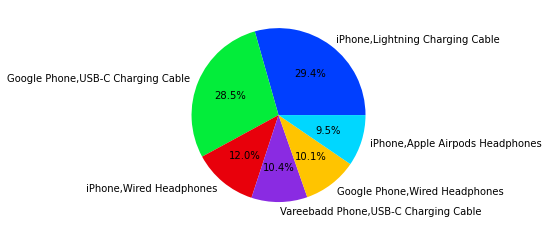

In [55]:
plt.pie(ser,labels=ser.index,autopct="%1.1f%%")